In [46]:
import pandas as pd
import scanpy as sc

In [47]:
anno = pd.read_csv('/Users/christoffer/Downloads/mtDSB_anno.csv')

In [48]:
anno

,sample_id,age,sex,genotype,condition
0,4403,60,male,PlptTA:mtPst1,mtDSB
1,4405,60,male,PlptTA:mtPst1,mtDSB
2,4282,60,male,PlptTA,control
3,4350,60,male,PlptTA,control
4,4401,60,female,PlptTA:mtPst1,mtDSB
5,4498,60,female,PlptTA,control
6,4627,21,male,PlptTA:mtPst1,mtDSB
7,4630,21,male,PlptTA:mtPst1,mtDSB
8,4620,21,male,mtPst1,control
9,4653,21,female,PlptTA:mtPst1,mtDSB


In [49]:
adata = sc.read_h5ad('../data/mtDNA_DSB_5k_clustered_LLM_anno.h5ad')

/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [50]:
anno.sample_id = 'RB'+anno.sample_id.astype(str)

In [51]:
for meta in ['age', 'sex','genotype','condition']:
    mapping_dict = dict(zip(anno['sample_id'], anno[meta]))
    adata.obs[meta] = adata.obs['sample_id'].map(mapping_dict)

In [55]:
adata.obs.age = adata.obs.age.astype(str)

In [56]:
adata[adata.obs.age.isna()].obs.sample_id.unique()

[], Categories (0, object): []

/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


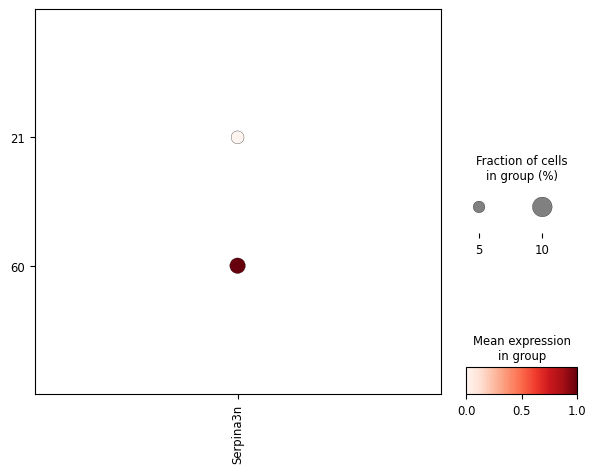

In [59]:
sc.pl.dotplot(
        adata,
        var_names=['Serpina3n'],
        groupby="age",
        standard_scale="var",
        #dot_max=0.5,
        #dot_min=0.05,
        color_map="Reds",
        #categories_order = order,
        dendrogram=False,
        figsize=(7, 5)
    )

/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


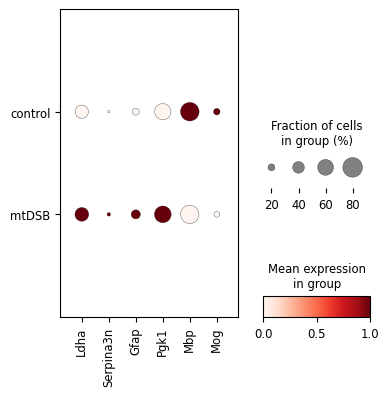

In [88]:
sc.pl.dotplot(
        adata,
        var_names=['Ldha','Serpina3n','Gfap','Pgk1','Mbp','Mog'],
        groupby="condition",
        standard_scale="var",
        #dot_max=0.5,
        #dot_min=0.05,
        color_map="Reds",
        #categories_order = order,
        dendrogram=False,
        figsize=(4, 4)
    )

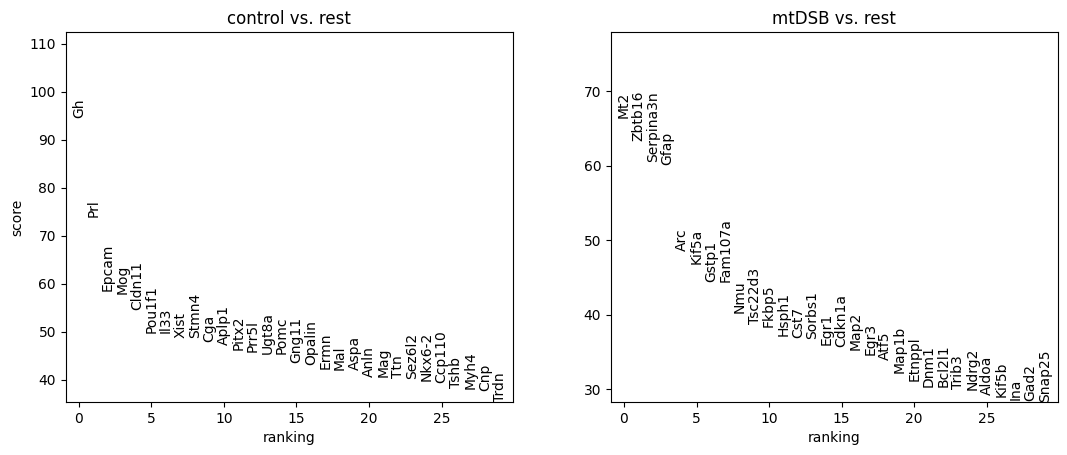

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,control,Gh,94.622093,4.159195,0.0,0.0
1,control,Prl,74.003517,5.532099,0.0,0.0
2,control,Epcam,58.616962,3.310595,0.0,0.0
3,control,Mog,57.853600,0.486680,0.0,0.0
4,control,Cldn11,54.650551,0.401592,0.0,0.0


In [71]:
# --- Find marker genes per cluster ---
sc.tl.rank_genes_groups(adata, groupby="condition", method="t-test")
sc.pl.rank_genes_groups(adata, n_genes=30, sharey=False, fontsize = 10)

# get a tidy table of top markers
markers = sc.get.rank_genes_groups_df(adata, group=None)
markers.head()

In [74]:
markers[markers.names == 'Pgk1']

,group,names,scores,logfoldchanges,pvals,pvals_adj
4952,control,Pgk1,-15.546561,-0.05051,1.704361e-54,3.208098e-53
5249,mtDSB,Pgk1,15.546561,0.05051,1.704361e-54,3.208098e-53


In [75]:
adata_60 = adata[adata.obs.age == '60']

/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


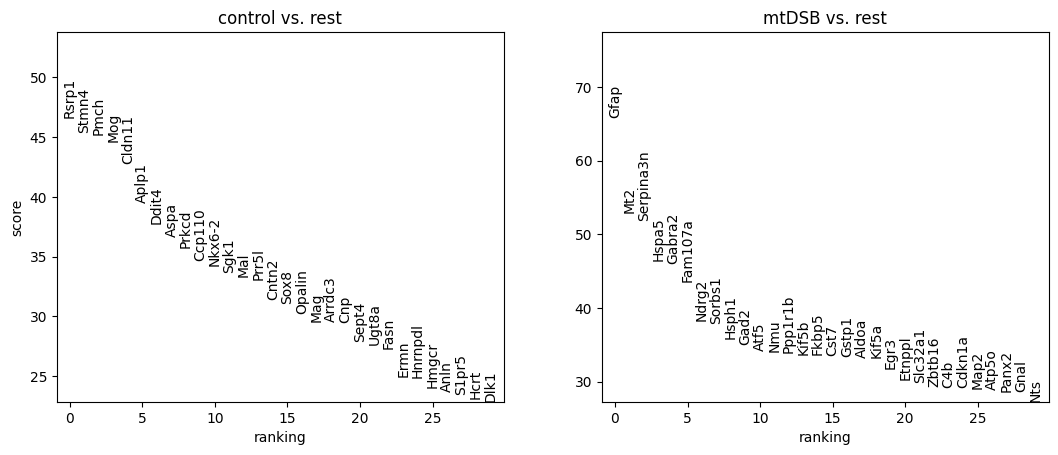

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,control,Rsrp1,46.646801,0.217925,0.0,0.0
1,control,Stmn4,45.332207,0.245631,0.0,0.0
2,control,Pmch,45.203197,2.984884,0.0,0.0
3,control,Mog,44.621758,0.530919,0.0,0.0
4,control,Cldn11,42.740261,0.436062,0.0,0.0


In [76]:
# --- Find marker genes per cluster ---
sc.tl.rank_genes_groups(adata_60, groupby="condition", method="t-test")
sc.pl.rank_genes_groups(adata_60, n_genes=30, sharey=False, fontsize = 10)

# get a tidy table of top markers
markers = sc.get.rank_genes_groups_df(adata_60, group=None)
markers.head()

In [82]:
marker_genes = pd.DataFrame({
    group: adata.uns['rank_genes_groups']['names'][group][:50]
    for group in adata.uns['rank_genes_groups']['names'].dtype.names
})
marker_genes.head()
#marker_genes.to_csv('../data/broad_markers_leiden0-5.csv')

,control,mtDSB
0,Gh,Mt2
1,Prl,Zbtb16
2,Epcam,Serpina3n
3,Mog,Gfap
4,Cldn11,Arc


In [83]:
combined_list = []
for col in marker_genes.columns: 
    print(col)
    genes = marker_genes[col].tolist()
    print(" ".join(genes))
    print(' ')
    combined_list.append(genes)
combined_list = [item for sublist in combined_list for item in sublist]
print()

control
Gh Prl Epcam Mog Cldn11 Pou1f1 Il33 Xist Stmn4 Cga Aplp1 Pitx2 Prr5l Ugt8a Pomc Gng11 Opalin Ermn Mal Aspa Anln Mag Ttn Sez6l2 Nkx6-2 Ccp110 Tshb Myh4 Cnp Trdn Fshb Myh1 Gpc4 Casq1 C030029H02Rik Cntn2 Mbp Des Ryr1 Actn2 Cldn9 Cpox Sept4 S1pr5 Scn4a Klhl41 Erbin Ghrhr Cacna1s H19
 
mtDSB
Mt2 Zbtb16 Serpina3n Gfap Arc Kif5a Gstp1 Fam107a Nmu Tsc22d3 Fkbp5 Hsph1 Cst7 Sorbs1 Egr1 Cdkn1a Map2 Egr3 Atf5 Map1b Etnppl Dnm1 Bcl2l1 Trib3 Ndrg2 Aldoa Kif5b Ina Gad2 Snap25 Bsn Per1 Pkd2l1 Kif5c Vamp2 Cldn10 Gabra2 Dnajb1 Kcnab2 Gpm6a Atp5o Dlg4 Syn1 Irs2 Cmip C4b Ppp2r1a Trh Sult1a1 Panx2
 

